# Phase 1: Exploratory Data Analysis (EDA)
**Shreya Das**

In this phase we are going to do some data clean-up and data preprocessing. This is important step to do as raw data may have missing inputs or incorrect data inputs that are not compatible with the data analysis we will perform in later phases.

## Importing Libraries
Here we will import the pandas package for data manipulation of the cancer dataset. We will then convert the cancer csv file to a dataframe in order to view the csv in a table format.

In [6]:
import pandas as pd
df = pd.read_csv("Brain_GSE50161 2.csv")
df

,samples,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,834,ependymoma,12.498150,7.604868,6.880934,9.027128,4.176175,7.224920,6.085942,6.835999,...,9.979005,9.926470,12.719785,12.777792,5.403657,4.870548,4.047380,3.721936,4.516434,4.749940
1,835,ependymoma,13.067436,7.998090,7.209076,9.723322,4.826126,7.539381,6.250962,8.012549,...,11.924749,11.215930,13.605662,13.401342,5.224555,4.895315,3.786437,3.564481,4.430891,4.491416
2,836,ependymoma,13.068179,8.573674,8.647684,9.613002,4.396581,7.813101,6.007746,7.178156,...,12.154405,11.532460,13.764593,13.477800,5.303565,5.052184,4.005343,3.595382,4.563494,4.668827
3,837,ependymoma,12.456040,9.098977,6.628784,8.517677,4.154847,8.361843,6.596064,6.347285,...,11.969072,11.288801,13.600828,13.379029,4.953429,4.708371,3.892318,3.759429,4.748381,4.521275
4,838,ependymoma,12.699958,8.800721,11.556188,9.166309,4.165891,7.923826,6.212754,6.866387,...,11.411701,11.169317,13.751442,13.803646,4.892677,4.773806,3.796856,3.577544,4.504385,4.541450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,959,pilocytic_astrocytoma,12.658228,8.843270,7.672655,9.125912,5.495477,8.603892,7.747514,5.828978,...,13.170441,12.676080,14.124837,13.996436,4.913579,4.399176,3.878855,3.680103,4.726784,4.564637
126,960,pilocytic_astrocytoma,12.812823,8.510550,8.729699,9.104402,3.967228,7.719089,7.092496,6.504812,...,13.040267,12.403316,13.978009,13.812916,5.189600,4.912618,3.764800,3.664920,4.628355,4.761351
127,961,pilocytic_astrocytoma,12.706991,8.795721,7.772359,8.327273,6.329383,8.550471,6.613332,6.308945,...,12.825383,12.439265,14.328373,14.008693,4.931460,4.712895,3.913637,3.700964,4.764693,4.834952
128,962,pilocytic_astrocytoma,12.684593,8.293938,7.228186,8.494428,6.049414,8.214729,7.287758,5.732710,...,13.116581,12.657967,14.390346,14.194904,4.871092,4.739400,3.782980,3.920363,4.665584,4.613326


Here we see that there are 130 rows by 54677 columns (as of 01-30-2025). According to this means that there is 130 samples and 54675 genes (Note: that column 1 and 2 are just the sample ID and the tissue type and thus are not included in the count of genes) is in this dataset. 

##Handling Missing Data
Our next step is to check if there is any null or incorrect values. If we find any values that are null or incorrect, we have to remove those samples from the dataset, otherwise it will skew the data analysis that we will perform in later phases.

First we will figure out if there are any NaN values in the entire dataframe.

In [7]:
print(df.isnull().T.any().sum())

0


Luckily, we don't have any cells that are null, so we can move on to the next step.

###Subdividing the Data
Since we know that there are 5 main tissue types in this dataset, we are going to subdivide this dataset into 5 groups. First we will use the **unique()** function to obtain the unique names the "type" column and we will print it out. The unique() function is in the numpy package, thus we will need to import that first.

In [8]:
import numpy as np

print(np.unique(df['type']))

['ependymoma' 'glioblastoma' 'medulloblastoma' 'normal'
 'pilocytic_astrocytoma']


Perfect we see that there are 5 tissue types: ependymoma, glioblastoma, medulloblastoma, normal, and pilocytic_astrocytoma. Based on these names, we will find which samples are corresponding to each of the tissue types.

In [9]:
df_ependymoma = df[df.type == 'ependymoma']

df_glioblastoma = df[df.type == 'glioblastoma']


df_medulloblastoma = df[df.type == 'medulloblastoma']


df_normal = df[df.type == 'normal']


df_pilocytic_astrocytoma = df[df.type == 'pilocytic_astrocytoma']

# See the number of samples between the dataframes

print(len(df_ependymoma))

print(len(df_glioblastoma))

print(len(df_medulloblastoma))

print(len(df_normal))

print(len(df_pilocytic_astrocytoma))

46
34
22
13
15


Doing some simple math (46 + 34 + 22 + 13 + 15 = 130 samples), we confirm that we are not missing any samples. Unfortunately, we see that not every tissue has the same number of samples avaliable. This makes our comparison to the control (normal tissue) a lot less straight forward. Additionally, the control group has the least amount of samples avaliable to us.

There are several ways we can solve this issue:
1. **Randomly Sample the from the experimental group to match the number of samples in the control group.** This solution is straightforward but can reduce statistical power of some analytical test. This is important to consider as reducing statistical power can reduce the likelihood of a statistical test finding a true statistical effect. Since we already have very small sample sizes, this may not be a viable option for us.

2. **Performing T-tests.** This is also not a great option since one of the assumption of t-tests is to have approximately the same sample size when doing comparisons. This is important because the t-test assumes the *homogeneity of variance*, meaning that both groups, although different in size, are assumed to have the approximate same variance. But when sample sizes are very different, variance is no longer approximately the same.

3. **Performing Welch's T-test.** This is a specific type of t-test where similar variance is not assumed between the groups. This is a much better t-test to perform for our case considering we have small samples sizes for each of the groups (less than n = 30) and approximately unequal group sizes. 

We will now write a function that will perform the welch's t-test on a gene in the experimental group (cancer) and the same gene in the control group (healthy).

In [10]:
# Install scipy
!pip3 install scipy


[notice] A new release of pip is available: 23.2.1 -> 25.0
[notice] To update, run: python3.12 -m pip install --upgrade pip


In [11]:
# Import scipy and numpy
import scipy.stats as stats
import numpy as np

df_ependymoma.head()

,samples,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,834,ependymoma,12.498150,7.604868,6.880934,9.027128,4.176175,7.224920,6.085942,6.835999,...,9.979005,9.926470,12.719785,12.777792,5.403657,4.870548,4.047380,3.721936,4.516434,4.749940
1,835,ependymoma,13.067436,7.998090,7.209076,9.723322,4.826126,7.539381,6.250962,8.012549,...,11.924749,11.215930,13.605662,13.401342,5.224555,4.895315,3.786437,3.564481,4.430891,4.491416
2,836,ependymoma,13.068179,8.573674,8.647684,9.613002,4.396581,7.813101,6.007746,7.178156,...,12.154405,11.532460,13.764593,13.477800,5.303565,5.052184,4.005343,3.595382,4.563494,4.668827
3,837,ependymoma,12.456040,9.098977,6.628784,8.517677,4.154847,8.361843,6.596064,6.347285,...,11.969072,11.288801,13.600828,13.379029,4.953429,4.708371,3.892318,3.759429,4.748381,4.521275
4,838,ependymoma,12.699958,8.800721,11.556188,9.166309,4.165891,7.923826,6.212754,6.866387,...,11.411701,11.169317,13.751442,13.803646,4.892677,4.773806,3.796856,3.577544,4.504385,4.541450


Remember that our dataframes for the cancer and healthy tissue groups contain sample ID and type in the first 2 columns (see above). These 2 columns are not important for the Welch's t-test that we want to perform. We won't be creating new dataframes, but this is important to keep in mind.

In [12]:
# Create a function to perform the Welch's t-test for 2 given groups

def Welch_ttest (df_1, gene):
        
    # Calculate using Welch's t-test the statistic and pval for gene in df_1 and df_normal
    stat, p = stats.ttest_ind(df_1[gene], df_normal[gene], equal_var = False)

    # Interpreting the statistics
    # Set the alpha level to 0.05 (this is industry standard)
    alpha = 0.05

    # If the calculated p-value is greater than the alpha value, this means there is a statistically significant difference between the 2 groups 
    # for that specific gene. This also means that we fail to reject H0.
    if p > alpha:
        interpretation = 'This gene is differentially expressed. (Fail to reject H0)'

    # Else the calculated p-value is less than the alpha value, this means there is a statistically insignificant difference between the 2 groups
    # for that specific gene. This also means that we accept the H0 
    else:
        interpretation = 'This gene is not differentially expressed. (Accept H0)'

    results = {'Gene': gene, 'Statistics':stat, 'p':p, 'alpha':alpha, 'Interpretation':interpretation}
    
    return results

        


Next, we are going to iterate through all the genes and calculate the Welch's t-test statistic for the experimental group and that gene. 

In [13]:
# Save the column names into a list
col_nams = df.columns.values.tolist()

# Save the gene names into a separate list
gene_names = col_nams[2:]

#table = pd.DataFrame({'Gene', 'Statistics', 'p', 'alpha', 'Interpretation'})

# For the next steps we want to create another DataFrame that will display all of the calculated statistics for each gene. 

# First, we will create an empty list (table_list) for which we will append each calculated gene statistics to this list. The for loop will create an empty dictionary for each gene in our original data
# and update a dictionary containing all calculated statistics from the Welch_ttest function to the empty dictionary. This dictionary will then be appended to the empty table_list. After iterating 
# through all the genes, table_list will be converted to a DataFrame 
table_list = []

for gene in gene_names:
    dict1 = {}

    dict1.update(Welch_ttest(df_ependymoma, gene))

    table_list.append(dict1)

df_stats_ependymoma = pd.DataFrame(table_list)

In [14]:
df_stats_ependymoma

,Gene,Statistics,p,alpha,Interpretation
0,1007_s_at,8.549862,4.551427e-07,0.05,This gene is not differentially expressed. (Ac...
1,1053_at,3.010169,7.539762e-03,0.05,This gene is not differentially expressed. (Ac...
2,117_at,2.946339,7.094482e-03,0.05,This gene is not differentially expressed. (Ac...
3,121_at,0.871461,3.902649e-01,0.05,This gene is differentially expressed. (Fail t...
4,1255_g_at,-5.365298,9.955036e-05,0.05,This gene is not differentially expressed. (Ac...
...,...,...,...,...,...
54670,AFFX-ThrX-5_at,-0.220623,8.286369e-01,0.05,This gene is differentially expressed. (Fail t...
54671,AFFX-ThrX-M_at,-1.418027,1.776941e-01,0.05,This gene is differentially expressed. (Fail t...
54672,AFFX-TrpnX-3_at,-0.594535,5.619077e-01,0.05,This gene is differentially expressed. (Fail t...
54673,AFFX-TrpnX-5_at,0.620717,5.421586e-01,0.05,This gene is differentially expressed. (Fail t...


Looking at the resulting DataFrame for the ependymoma group, we see that 51% of the genes are differentially expressed and 49% are not differentially expressed.

Let's do the same stats calculations for the other experimental groups.

In [15]:
# The next lines are copied from a previous cell
table_list = []    
for gene in gene_names:
    dict1 = {}

    dict1.update(Welch_ttest(df_glioblastoma, gene))

    table_list.append(dict1)

df_stats_glioblastoma = pd.DataFrame(table_list)

df_stats_glioblastoma

,Gene,Statistics,p,alpha,Interpretation
0,1007_s_at,6.109568,0.000008,0.05,This gene is not differentially expressed. (Ac...
1,1053_at,6.284144,0.000002,0.05,This gene is not differentially expressed. (Ac...
2,117_at,3.759057,0.001005,0.05,This gene is not differentially expressed. (Ac...
3,121_at,1.047483,0.302100,0.05,This gene is differentially expressed. (Fail t...
4,1255_g_at,-3.576847,0.002181,0.05,This gene is not differentially expressed. (Ac...
...,...,...,...,...,...
54670,AFFX-ThrX-5_at,-0.215136,0.832320,0.05,This gene is differentially expressed. (Fail t...
54671,AFFX-ThrX-M_at,-0.363187,0.720713,0.05,This gene is differentially expressed. (Fail t...
54672,AFFX-TrpnX-3_at,-0.956641,0.356260,0.05,This gene is differentially expressed. (Fail t...
54673,AFFX-TrpnX-5_at,0.356881,0.724382,0.05,This gene is differentially expressed. (Fail t...


In [16]:
table_list = []    
for gene in gene_names:
    dict1 = {}

    dict1.update(Welch_ttest(df_medulloblastoma, gene))

    table_list.append(dict1)

df_stats_medulloblastoma = pd.DataFrame(table_list)

df_stats_medulloblastoma

,Gene,Statistics,p,alpha,Interpretation
0,1007_s_at,-0.616589,0.543346,0.05,This gene is differentially expressed. (Fail t...
1,1053_at,5.422061,0.000016,0.05,This gene is not differentially expressed. (Ac...
2,117_at,-0.473223,0.642064,0.05,This gene is differentially expressed. (Fail t...
3,121_at,-0.596744,0.554786,0.05,This gene is differentially expressed. (Fail t...
4,1255_g_at,-4.627142,0.000253,0.05,This gene is not differentially expressed. (Ac...
...,...,...,...,...,...
54670,AFFX-ThrX-5_at,-1.131039,0.274949,0.05,This gene is differentially expressed. (Fail t...
54671,AFFX-ThrX-M_at,-0.397812,0.694706,0.05,This gene is differentially expressed. (Fail t...
54672,AFFX-TrpnX-3_at,-0.233311,0.818677,0.05,This gene is differentially expressed. (Fail t...
54673,AFFX-TrpnX-5_at,1.387282,0.174658,0.05,This gene is differentially expressed. (Fail t...


In [17]:
table_list = []    
for gene in gene_names:
    dict1 = {}

    dict1.update(Welch_ttest(df_pilocytic_astrocytoma, gene))

    table_list.append(dict1)

df_stats_pilocytic_astrocytoma = pd.DataFrame(table_list)

df_stats_pilocytic_astrocytoma

,Gene,Statistics,p,alpha,Interpretation
0,1007_s_at,9.059796,6.470481e-08,0.05,This gene is not differentially expressed. (Ac...
1,1053_at,1.957004,6.234891e-02,0.05,This gene is differentially expressed. (Fail t...
2,117_at,1.820910,8.395235e-02,0.05,This gene is differentially expressed. (Fail t...
3,121_at,1.287618,2.108092e-01,0.05,This gene is differentially expressed. (Fail t...
4,1255_g_at,-1.336725,1.934718e-01,0.05,This gene is differentially expressed. (Fail t...
...,...,...,...,...,...
54670,AFFX-ThrX-5_at,0.214125,8.326977e-01,0.05,This gene is differentially expressed. (Fail t...
54671,AFFX-ThrX-M_at,-0.978432,3.411052e-01,0.05,This gene is differentially expressed. (Fail t...
54672,AFFX-TrpnX-3_at,-0.522645,6.079845e-01,0.05,This gene is differentially expressed. (Fail t...
54673,AFFX-TrpnX-5_at,0.154456,8.784601e-01,0.05,This gene is differentially expressed. (Fail t...


Before we export the dataframes containing the statistics, we are going to visualize the percentage of the statistically significant genes that are differentially expressed in each experimental group.

We will use seaborn package for data visualization.

In [18]:
%pip install seaborn


[notice] A new release of pip is available: 23.2.1 -> 25.0
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [19]:
import seaborn as sns
sns.set_style("ticks")
import matplotlib.pylab as plt

## Frequency plot of statistically significant vs. statistically non-significant genes

Using **countplot** we can show the frequency of each groups

### Ependymoma

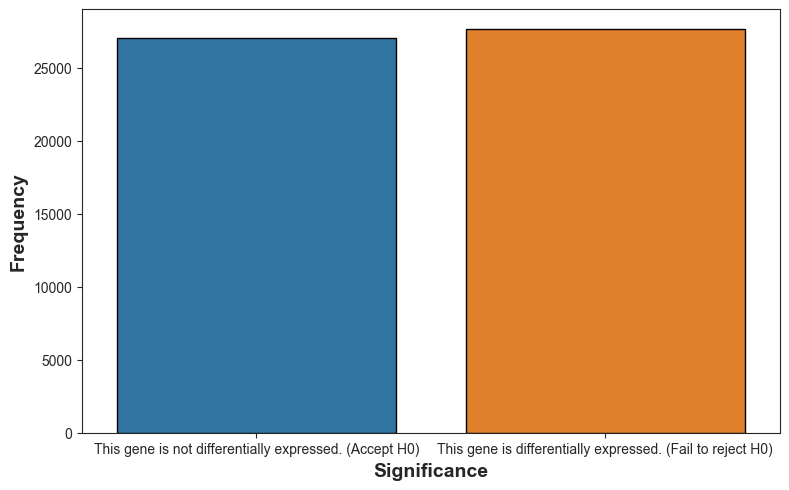

In [24]:
# This creates a new figure of size 5.5 inches by 5.5 inches 
plt.figure(figsize=(9, 5.5))

# Using seaborn, we create a 'countplot' that will display the number of drugs that are either classified as inactive or active
sns.countplot(x='Interpretation', data=df_stats_ependymoma, edgecolor='black', hue = "Interpretation")

# We add x and y labels to the figure
plt.xlabel('Significance', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

# We save the figure as a .pdf file and give it a name
plt.savefig('plot_ependymoma_stats.pdf')

### Glioblastoma

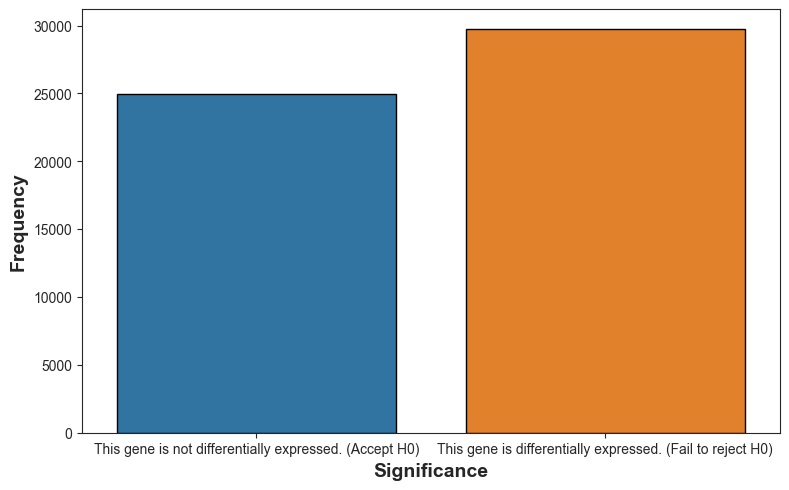

In [25]:
# This creates a new figure of size 5.5 inches by 5.5 inches 
plt.figure(figsize=(9, 5.5))

# Using seaborn, we create a 'countplot' that will display the number of drugs that are either classified as inactive or active
sns.countplot(x='Interpretation', data=df_stats_glioblastoma, edgecolor='black', hue = "Interpretation")

# We add x and y labels to the figure
plt.xlabel('Significance', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

# We save the figure as a .pdf file and give it a name
plt.savefig('plot_glioblastoma_stats.pdf')

### Medulloblastoma

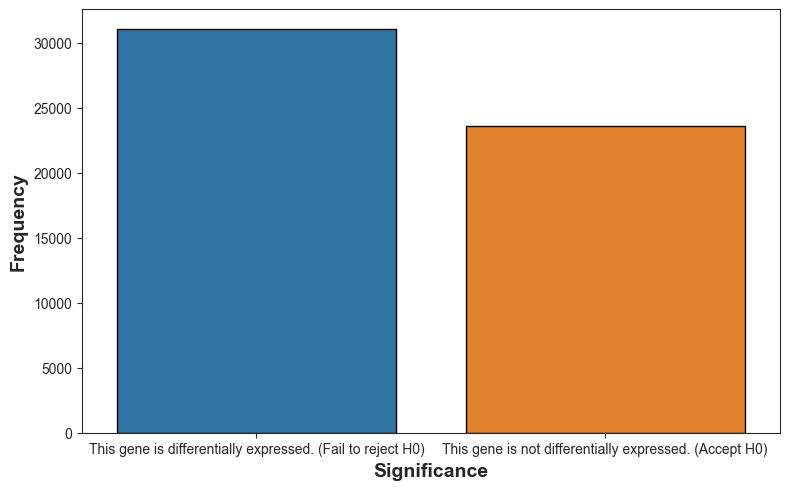

In [28]:
# This creates a new figure of size 5.5 inches by 5.5 inches 
plt.figure(figsize=(9, 5.5))

# Using seaborn, we create a 'countplot' that will display the number of drugs that are either classified as inactive or active
sns.countplot(x='Interpretation', data=df_stats_medulloblastoma, edgecolor='black', hue = "Interpretation")

# We add x and y labels to the figure
plt.xlabel('Significance', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

# We save the figure as a .pdf file and give it a name
plt.savefig('plot_medulloblastoma_stats.pdf')

### Pilocytic Astrocytoma

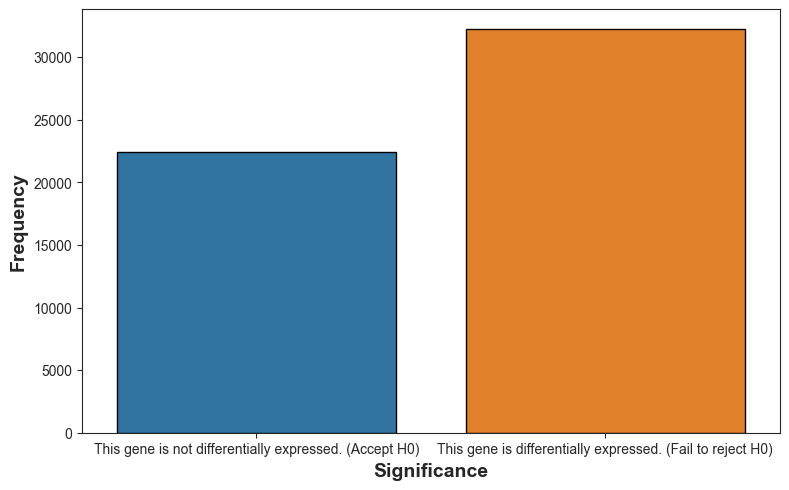

In [27]:
# This creates a new figure of size 5.5 inches by 5.5 inches 
plt.figure(figsize=(9, 5.5))

# Using seaborn, we create a 'countplot' that will display the number of drugs that are either classified as inactive or active
sns.countplot(x='Interpretation', data=df_stats_pilocytic_astrocytoma, edgecolor='black', hue = "Interpretation")

# We add x and y labels to the figure
plt.xlabel('Significance', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

# We save the figure as a .pdf file and give it a name
plt.savefig('plot_pilocytic_astrocytoma_stats.pdf')

We are going to save these dataframes into seperate .csv files, to use for our next step: Analysis of Differential Gene Expression.

In [21]:
df_stats_ependymoma.to_csv("EDA_stats_ependymoma")
df_stats_medulloblastoma.to_csv("EDA_stats_medulloblastoma")
df_stats_glioblastoma.to_csv("EDA_stats_glioblastoma")
df_stats_pilocytic_astrocytoma.to_csv("EDA_stats_pilocytic_astrocytoma")